# Task 1: Prediction using Supervised ML
## <blockquote>Simple Linear Regression Task <br>Predict the percentage of an student based on the number of study hours.</blockquote>
### Author: Marisha Bhatti
<br>
<br>

  - <b>Step 1:</b> Import all required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

 - <b>Step 2:</b> Import and visualise the dataset

In [2]:
# Import the dataset
df = pd.read_csv('http://bit.ly/w-data')
df.head(10)
# len(df) # checking the length of the imported dataset (25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


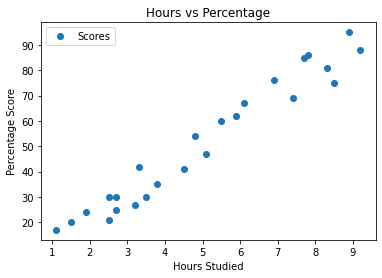

In [3]:
# Plot the distribution
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

The distribution of scores is plotted to visualise the data and understand the relationship. The graph indicates a positive linear relationship between the number of hours studied and percentage of score.

 - <b>Step 3:</b> Prepare the data

In [4]:
# Divide the data into "attributes" (inputs) and "labels" (outputs)
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [5]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=0)

print(val_X) # Testing data - In Hours

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


Here, the length of testing data is 5 which is 20% of 25 (length of original dataset). The general split ratio has been taken into consideration, but it can be changed using the test_size attribute to train_test_split function.

 - <b>Step 4:</b> Build and Train the model

In [6]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(train_X,train_y)

print("Training complete.")

Training complete.


 - <b>Step 5:</b> Making Predictions

In [7]:
# Predict the scores
pred_y = model.predict(val_X)

In [8]:
# Compare Actual vs Predicted Scores
df = pd.DataFrame({'Actual': val_y, 'Predicted': pred_y})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


 - <b>Step 6:</b> Plot the Regression Line and compare it to actual test data

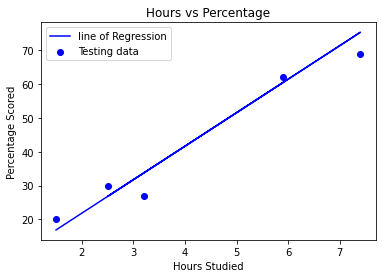

In [9]:
# Plot Regression Line
plt.plot(val_X,pred_y,color='blue',label="line of Regression")

# Plot Actual Data
plt.scatter(val_X,val_y,color='blue', label="Testing data")
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored') 
plt.legend()
plt.show()

 - <b>Step 7:</b> Model Evaluation

Mean Absolute Error: Absolute error refers to the magnitude of difference between the prediction of an observation and the true value of that observation.<br>
R2 Score: coefficient of determination; (total variance explained by model) / (total variance); The value ranges from 0 to 1 and should ideally be close to 1.

In [10]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(val_y, pred_y)) 
print('R2 Score:', metrics.r2_score(val_y, pred_y))

Mean Absolute Error: 4.183859899002982
R2 Score: 0.9454906892105354


 - Testing our own data: What will be predicted score if a student studies for 9.25 hrs/ day?

In [11]:
# Method 1: using regression line
m=model.coef_
c=model.intercept_
x=9.25
y=m*x+c
print('Predicted score from graph =', y[0])

# Method 2: using the predict function
hours = [[9.25]]
test_case = model.predict(hours)
print("Predicted score from model = ", test_case[0])

Predicted score from graph = 93.69173248737539
Predicted score from model =  93.69173248737539


Both methods make use of the same model, just different approaches, hence the same score.

# <b>_____________</b>